In [ ]:
cd Documents/Uni/Rahnema\ College/Project

/Users/arman/Documents/Uni/Rahnema College/Project


In [ ]:
ls

clean_data.py            result.json              رهنما کالج.pdf


# Packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Dataset

In [ ]:
df = pd.read_json('result.json')

### Preview data

In [ ]:
df.head()

,datetime,http_user_agent,ip,status_code,request_length,request_time,http_method,url
0,2021-05-12 05:06:00+04:30,[Googlebot-Image/1.0],207.213.193.143,304,0,32,Get,/cdn/profiles/1026106239
1,2021-05-12 05:06:00+04:30,[Googlebot-Image/1.0],207.213.193.143,304,0,4,Get,images/badge.png
2,2021-05-12 05:06:00+04:30,"[[Linux, Android 6.0.1, SAMSUNG SM-J710GN Buil...",35.110.222.153,200,52567,32,Get,/pages/630180847
3,2021-05-12 05:06:00+04:30,"[[Linux, Android 6.0, CAM-L21], [KHTML, like G...",35.108.208.99,200,23531,20,Get,images/fav_icon2.ico
4,2021-05-12 05:06:00+04:30,"[[Linux, Android 6.0.1, SAMSUNG SM-J710GN Buil...",35.110.222.153,200,4680,8,Get,images/sanjagh_logo_purpule5.png


In [ ]:
df.describe()

,status_code,request_length
count,1.260035e+06,1.260035e+06
mean,2.313682e+02,4.580962e+04
std,5.804793e+01,3.350437e+05
min,1.010000e+02,0.000000e+00
25%,2.000000e+02,0.000000e+00
50%,2.000000e+02,1.201000e+03
75%,3.040000e+02,2.650500e+04
max,5.030000e+02,1.022335e+08


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260035 entries, 0 to 1260034
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype                                
---  ------           --------------    -----                                
 0   datetime         1260035 non-null  datetime64[ns, pytz.FixedOffset(270)]
 1   http_user_agent  1260035 non-null  object                               
 2   ip               1260035 non-null  object                               
 3   status_code      1260035 non-null  int64                                
 4   request_length   1260035 non-null  int64                                
 5   request_time     1260035 non-null  object                               
 6   http_method      1260035 non-null  object                               
 7   url              1260035 non-null  object                               
dtypes: datetime64[ns, pytz.FixedOffset(270)](1), int64(2), object(5)
memory usage: 76.9+ MB


# Visualize

In [ ]:
df.head()

,datetime,http_user_agent,ip,status_code,request_length,request_time,http_method,url
0,2021-05-12 05:06:00+04:30,[Googlebot-Image/1.0],207.213.193.143,304,0,32,Get,/cdn/profiles/1026106239
1,2021-05-12 05:06:00+04:30,[Googlebot-Image/1.0],207.213.193.143,304,0,4,Get,images/badge.png
2,2021-05-12 05:06:00+04:30,"[[Linux, Android 6.0.1, SAMSUNG SM-J710GN Buil...",35.110.222.153,200,52567,32,Get,/pages/630180847
3,2021-05-12 05:06:00+04:30,"[[Linux, Android 6.0, CAM-L21], [KHTML, like G...",35.108.208.99,200,23531,20,Get,images/fav_icon2.ico
4,2021-05-12 05:06:00+04:30,"[[Linux, Android 6.0.1, SAMSUNG SM-J710GN Buil...",35.110.222.153,200,4680,8,Get,images/sanjagh_logo_purpule5.png


### Request Lenght

In [ ]:
df.request_length.describe()

count    1.240227e+06
mean     4.648727e+04
std      3.376622e+05
min      0.000000e+00
25%      0.000000e+00
50%      1.201000e+03
75%      2.741100e+04
max      1.022335e+08
Name: request_length, dtype: float64

[Text(0.5, 0, 'Request Lenght < 200000')]

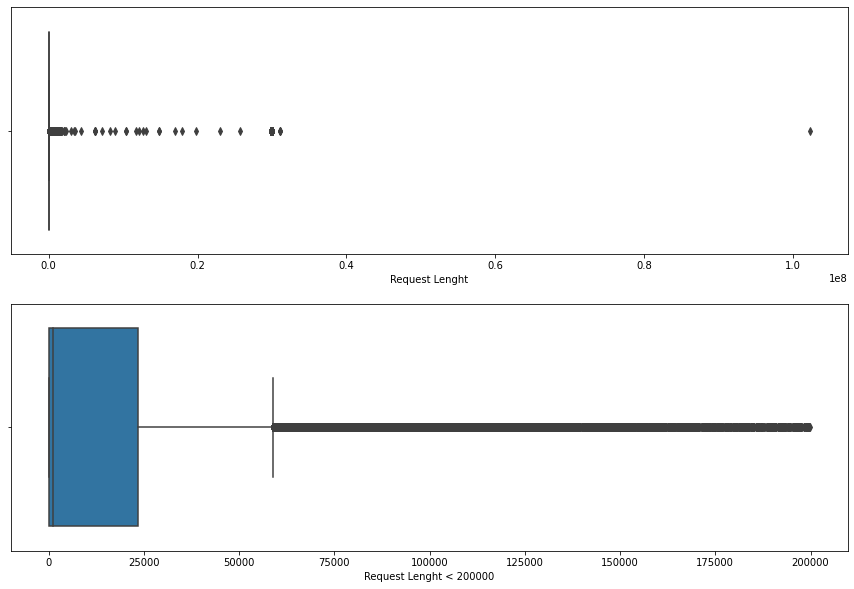

In [ ]:
f, axes = plt.subplots(2, figsize=(15,10))
x = sns.boxplot(x=df.request_length, ax=axes[0])
limited_x = sns.boxplot(x=df.request_length[df.request_length < 200000], ax=axes[1])
x.set(xlabel='Request Lenght')
limited_x.set(xlabel='Request Lenght < 200000')

### Request time

In [ ]:
df.request_time.describe()

count    1.240227e+06
mean     6.819186e+03
std      1.845683e+05
min      0.000000e+00
25%      4.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      1.750470e+08
Name: request_time, dtype: float64

/usr/local/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


[Text(0.5, 0, 'Request Time < 45')]

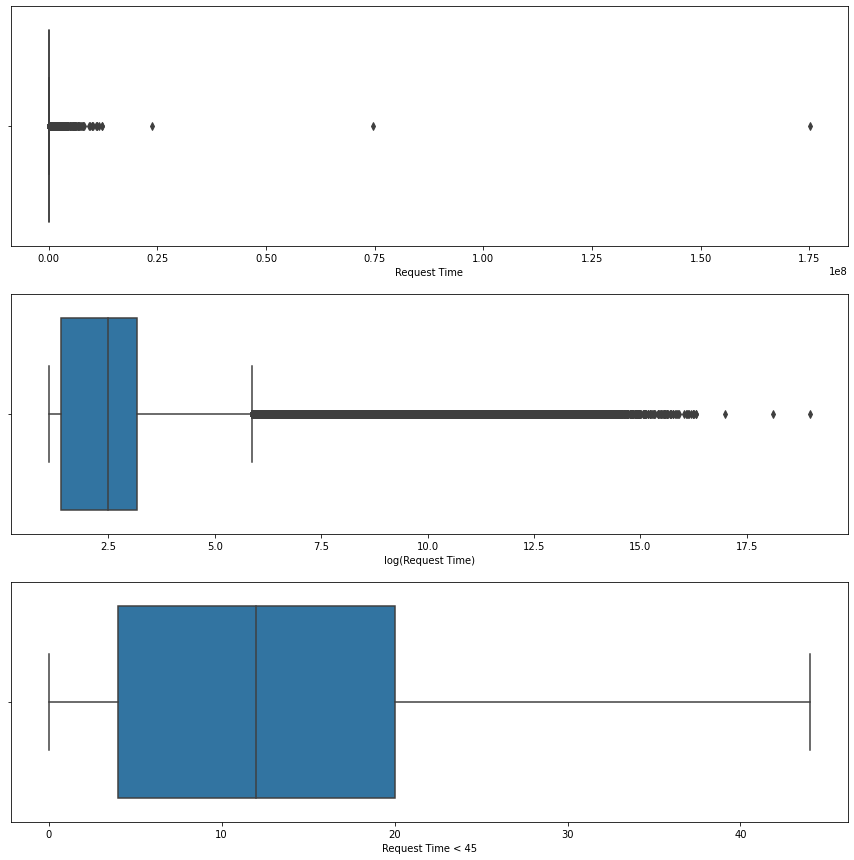

In [ ]:
f, axes = plt.subplots(3, figsize=(15,15))
x = sns.boxplot(x=df.request_time, ax=axes[0])
log_x = sns.boxplot(x=np.log(df.request_time), ax=axes[1])
limited_x = sns.boxplot(x=df.request_time[df.request_time < 45], ax=axes[2])
x.set(xlabel='Request Time')
log_x.set(xlabel='log(Request Time)')
limited_x.set(xlabel='Request Time < 45')

### Http Method

In [ ]:
method_count = df.http_method.value_counts()

In [ ]:
method_count.values

array([1122012,   65447,   32436,   20195,     137])

[Text(0.5, 0, 'Http Method Pir Plot without "Get"')]

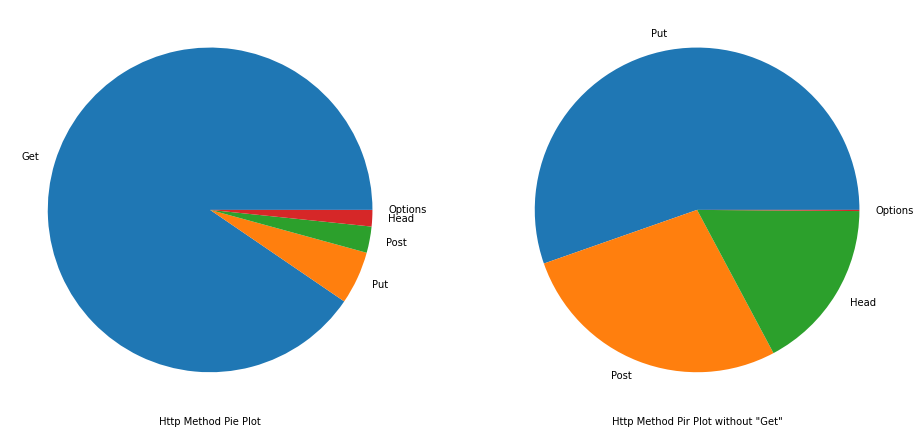

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(16,8))
axs[0].pie(df.http_method.value_counts().values, 
          labels=df.http_method.value_counts().index.values)
axs[1].pie(df.http_method[df.http_method != 'Get'].value_counts().values, 
          labels=df.http_method[df.http_method != 'Get'].value_counts().index.values)
axs[0].set(xlabel='Http Method Pie Plot')
axs[1].set(xlabel='Http Method Pir Plot without "Get"')

[Text(0.5, 0, 'Http Method Histogram without "Get"')]

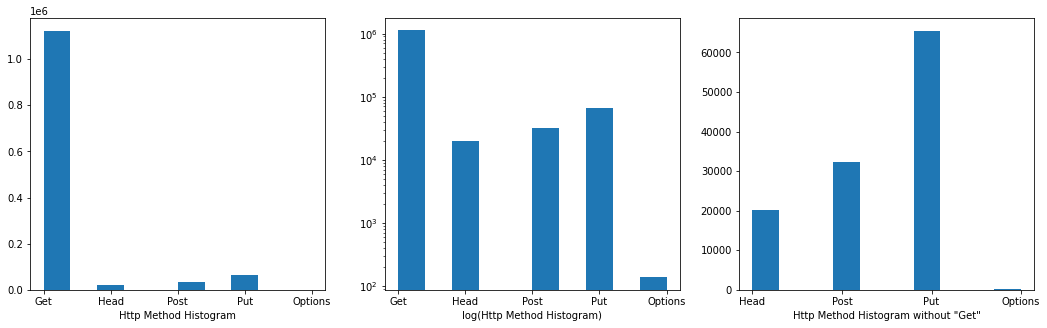

In [ ]:
fig, axs = plt.subplots(1,3,figsize=(18,5))
axs[0].hist(df.http_method)
axs[1].hist(df.http_method, log=True)
axs[2].hist(df.http_method[df.http_method != 'Get'])
axs[0].set(xlabel='Http Method Histogram')
axs[1].set(xlabel='log(Http Method Histogram)')
axs[2].set(xlabel='Http Method Histogram without "Get"')

# Preprocess

In [ ]:
df.head()

,datetime,http_user_agent,ip,status_code,request_length,request_time,http_method,url
0,2021-05-12 05:06:00+04:30,[Googlebot-Image/1.0],207.213.193.143,304,0,32,Get,/cdn/profiles/1026106239
1,2021-05-12 05:06:00+04:30,[Googlebot-Image/1.0],207.213.193.143,304,0,4,Get,images/badge.png
2,2021-05-12 05:06:00+04:30,"[[Linux, Android 6.0.1, SAMSUNG SM-J710GN Buil...",35.110.222.153,200,52567,32,Get,/pages/630180847
3,2021-05-12 05:06:00+04:30,"[[Linux, Android 6.0, CAM-L21], [KHTML, like G...",35.108.208.99,200,23531,20,Get,images/fav_icon2.ico
4,2021-05-12 05:06:00+04:30,"[[Linux, Android 6.0.1, SAMSUNG SM-J710GN Buil...",35.110.222.153,200,4680,8,Get,images/sanjagh_logo_purpule5.png


In [ ]:
df = df[df.request_time.apply(lambda x: x.isnumeric())]

In [ ]:
df.request_time = df.request_time.astype('int64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1240227 entries, 0 to 1260034
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype                                
---  ------           --------------    -----                                
 0   datetime         1240227 non-null  datetime64[ns, pytz.FixedOffset(270)]
 1   http_user_agent  1240227 non-null  object                               
 2   ip               1240227 non-null  object                               
 3   status_code      1240227 non-null  int64                                
 4   request_length   1240227 non-null  int64                                
 5   request_time     1240227 non-null  int64                                
 6   http_method      1240227 non-null  object                               
 7   url              1240227 non-null  object                               
dtypes: datetime64[ns, pytz.FixedOffset(270)](1), int64(3), object(4)
memory usage: 117.4+ MB


In [ ]:
df[['status_code', 'http_method', 'url']].nunique()

status_code        16
http_method         5
url            138813
dtype: int64

In [ ]:
df.describe()

,status_code,request_length,request_time
count,1.240227e+06,1.240227e+06,1.240227e+06
mean,2.303822e+02,4.648727e+04,6.819186e+03
std,5.787077e+01,3.376622e+05,1.845683e+05
min,1.010000e+02,0.000000e+00,0.000000e+00
25%,2.000000e+02,0.000000e+00,4.000000e+00
50%,2.000000e+02,1.201000e+03,1.200000e+01
75%,3.040000e+02,2.741100e+04,2.400000e+01
max,5.030000e+02,1.022335e+08,1.750470e+08
